In [105]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import warnings

warnings.filterwarnings('ignore')
sns.set_palette('Paired')

In [106]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (6,5)
plt.rcParams['font.size'] = 12

# 한글 폰트 적용/ 학원,노트북 모두
from matplotlib import font_manager, rc
font = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=font).get_name()
rc('font', family=font_name)

In [6]:
titanic=pd.read_csv('../data/titanic.csv')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
titanic.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

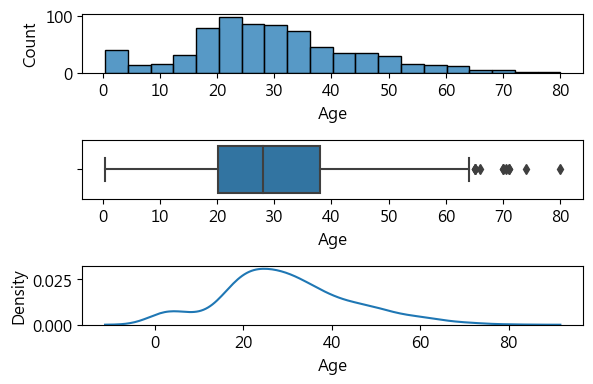

In [23]:
plt.subplot(3,1,1)
sns.histplot(data=titanic, x='Age')
plt.subplot(3,1,2)
sns.boxplot(data=titanic, x= 'Age')
plt.subplot(3,1,3)
sns.kdeplot(data=titanic, x='Age')
plt.tight_layout()

In [24]:
titanic.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<Axes: xlabel='Fare', ylabel='Density'>

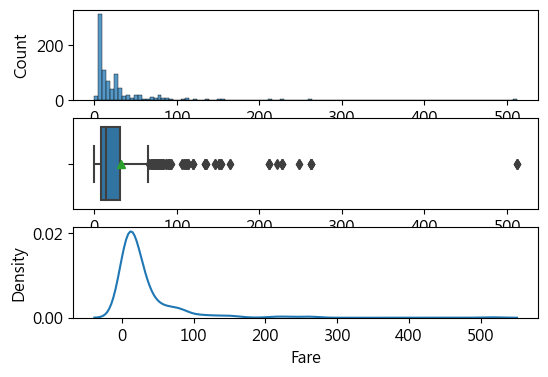

In [30]:
plt.subplot(3,1,1)
sns.histplot(data=titanic, x='Fare')
plt.subplot(3,1,2)
sns.boxplot(data=titanic, x='Fare',showmeans=True)
plt.subplot(3,1,3)
sns.kdeplot(data=titanic, x='Fare')

In [34]:
stats.shapiro(titanic.Fare)

ShapiroResult(statistic=0.5218917727470398, pvalue=1.0789998175301091e-43)

In [32]:
stats.anderson(titanic.Fare)

AndersonResult(statistic=122.16962721459197, critical_values=array([0.573, 0.653, 0.784, 0.914, 1.087]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=32.204207968574636, scale=49.693428597180905)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [37]:
IQR=titanic.Fare.quantile(0.75) - titanic.Fare.quantile(0.25)
IQR

23.0896

In [43]:
high_border=titanic.Fare.quantile(0.75) + IQR*1.5
low_border=titanic.Fare.quantile(0.25) - IQR*1.5
print(low_border, high_border)

-26.724 65.6344


<Axes: xlabel='Fare'>

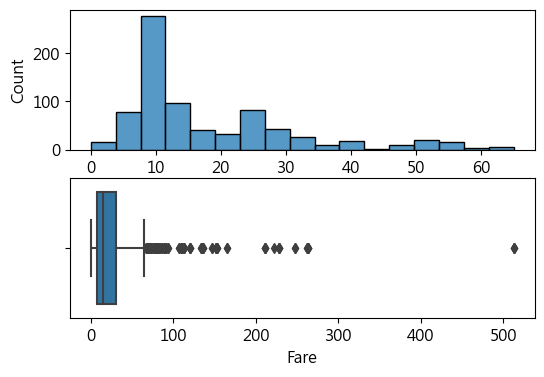

In [54]:
titanic1=titanic[(titanic['Fare']>low_border) & (titanic.Fare <high_border)]
plt.subplot(2,1,1)
sns.histplot(data=titanic1, x='Fare')
plt.subplot(2,1,2)
sns.boxplot(data=titanic, x='Fare')

In [58]:
stats.shapiro(titanic.Fare)

ShapiroResult(statistic=0.5218917727470398, pvalue=1.0789998175301091e-43)

In [59]:
stats.anderson(titanic1.Fare)

AndersonResult(statistic=51.66129920050503, critical_values=array([0.573, 0.653, 0.783, 0.913, 1.086]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=17.82209070967742, scale=13.57808535378775)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [62]:
titanic.Pclass.value_counts()
titanic.Pclass.value_counts() / len(titanic.Pclass)

Pclass
3    0.551066
1    0.242424
2    0.206510
Name: count, dtype: float64

([<matplotlib.patches.Wedge at 0x23c57e344d0>,
 [Text(-0.17571616709359641, 1.0858746836637898, '3'),
  Text(-0.5160762002061153, -0.9714243951954356, '1'),
  Text(0.8765111456658484, -0.6646263698677192, '2')],
 [Text(-0.09584518205105258, 0.5922952819984307, '55.11%'),
  Text(-0.2814961092033356, -0.5298678519247829, '24.24%'),
  Text(0.47809698854500815, -0.3625234744733013, '20.65%')])

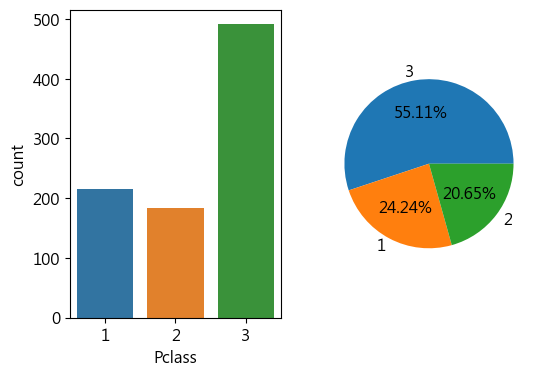

In [73]:
p_cnt=titanic.Pclass.value_counts()
plt.subplot(1,2,1)
sns.countplot(data=titanic, x='Pclass')
plt.subplot(1,2,2)
plt.pie(p_cnt.values, labels=p_cnt.index, autopct='%.2f%%')


In [75]:
air=pd.read_csv('../data/ozone.csv')
air.describe()

,Ozone,Solar.R,Wind,Temp
count,153.000000,146.000000,153.000000,153.000000
mean,42.052288,185.931507,9.957516,77.882353
std,30.156127,90.058422,3.523001,9.465270
min,1.000000,7.000000,1.700000,56.000000
25%,20.000000,115.750000,7.400000,72.000000
50%,34.000000,205.000000,9.700000,79.000000
75%,59.000000,258.750000,11.500000,85.000000
max,168.000000,334.000000,20.700000,97.000000


<Axes: xlabel='Temp', ylabel='Ozone'>

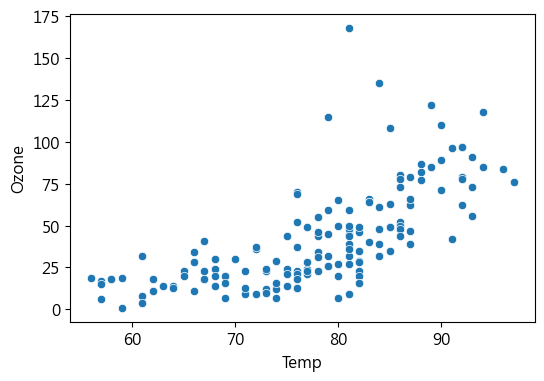

In [87]:
sns.scatterplot(data=air, x='Temp',y='Ozone')

<Axes: xlabel='Wind', ylabel='Ozone'>

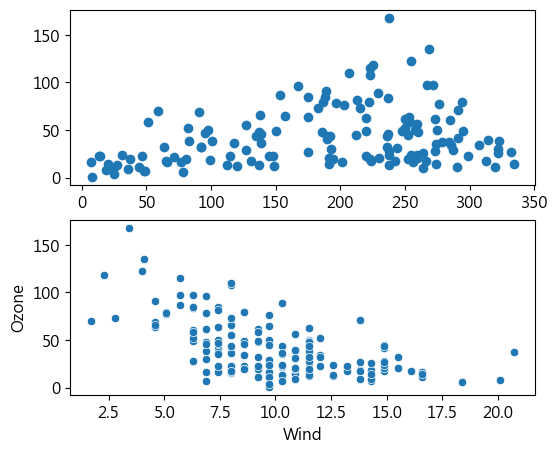

In [92]:
plt.subplot(2,1,1)
plt.scatter('Solar.R','Ozone',data=air, )
plt.subplot(2,1,2)
sns.scatterplot(data=air, x='Wind',y='Ozone')

<Axes: xlabel='Solar.R', ylabel='Ozone'>

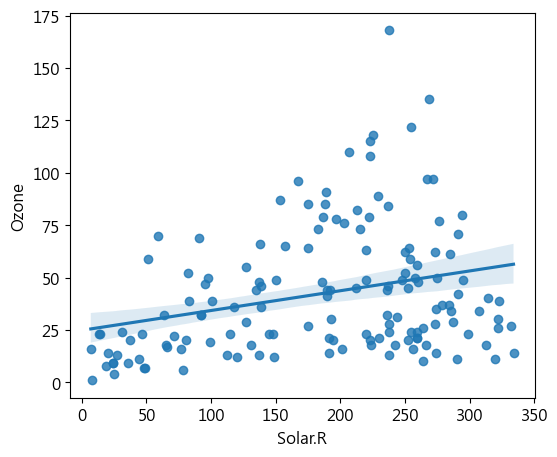

In [94]:
sns.regplot(data=air, x='Solar.R',y='Ozone')

In [96]:
stats.pearsonr(air.Temp,air.Ozone)

PearsonRResult(statistic=0.6833717861490115, pvalue=2.197769800200284e-22)

In [101]:
cor_1=air.corr(numeric_only=True)

<Axes: >

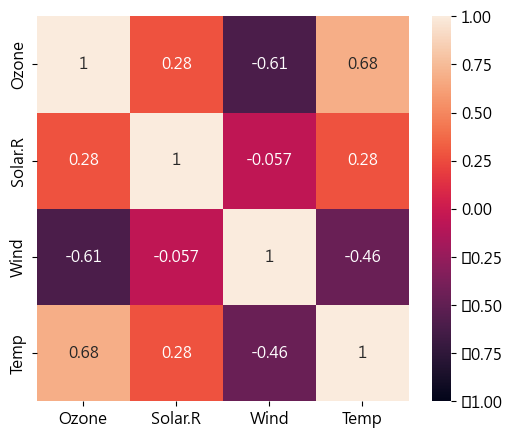

In [107]:
sns.heatmap(cor_1, vmin=-1, vmax=1, annot=True)

In [108]:
pd.crosstab(titanic.Survived, titanic.Sex)

Sex,female,male
Survived,,
0,81,468
1,233,109


In [109]:
pd.crosstab(titanic.Survived, titanic.Sex, normalize='index')

Sex,female,male
Survived,,
0,0.147541,0.852459
1,0.681287,0.318713


In [111]:
pd.crosstab(titanic.Survived, titanic.Sex, normalize='all')

Sex,female,male
Survived,,
0,0.090909,0.525253
1,0.261504,0.122334


Sex,female,male
Survived,,
0,0.147541,0.852459
1,0.681287,0.318713


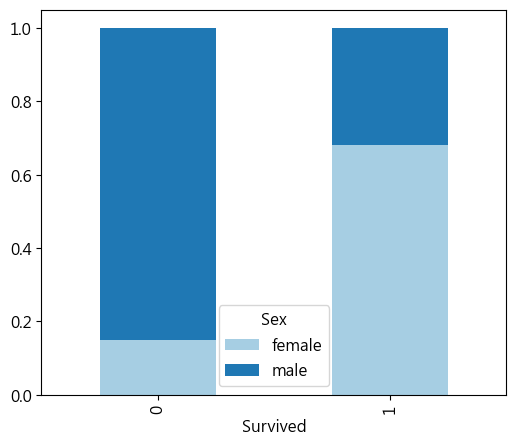

In [118]:
c=pd.crosstab(titanic.Survived, titanic.Sex, normalize='index')
c.plot.bar(stacked=True)

<Axes: xlabel='Sex', ylabel='count'>

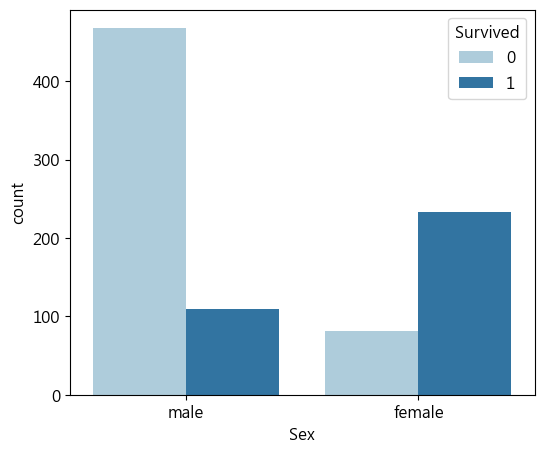

In [128]:
sns.countplot(data=titanic,x='Sex', hue='Survived' )

In [129]:
table=pd.crosstab(titanic.Survived, titanic.Sex)

In [132]:
result=stats.chi2_contingency(table)
result[1]

1.1973570627755645e-58